# EDA-Calidad del dataset Air_Quality

## Librerías

In [52]:
import os
import warnings

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from deep_translator import GoogleTranslator

## Ajustes

Se ignoran los warnings.

In [54]:
warnings.filterwarnings("ignore")

Se hacen unas modificaciones en la configuracion para que los resultados salgan completos.

In [55]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

## Diccionario de Datos

Se importa el diccionario y se obtiene su info.

In [ ]:
ruta_actual = os.getcwd()

ruta_del_proyecto = os.path.dirname(
    ruta_actual
    )

ruta_del_diccionario = os.path.join(
    ruta_del_proyecto, 
    'assets', 
    'Data_dictionary', 
    'Data-Dictionary-Air_Quality_2024.xlsx'
    )

diccionario = pd.read_excel(
    ruta_del_diccionario, 
    sheet_name='Column Information', 
    header=1
    )

diccionario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Column Name              13 non-null     object 
 1   Column Description       13 non-null     object 
 2   Expected/Allowed Values  2 non-null      object 
 3   Field Limitations        10 non-null     object 
 4   Additional Notes         0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 652.0+ bytes


Se va a eliminar la última columna llamada Additional Notes porque solo tiene nulos y se necesita optimizar la visualizacion.

In [ ]:
diccionario.drop(columns='Additional Notes', inplace=True)

Se va a traducir el diccionario.

In [ ]:
def traducir_nombres_columnas(columnas, idioma_destino):
    translator = GoogleTranslator(source='en', target=idioma_destino)
    return [translator.translate(nombre) for nombre in columnas]

diccionario.columns = traducir_nombres_columnas(diccionario.columns, 'es')

def traducir_fila(texto, idioma_destino):
    translator = GoogleTranslator(source='en', target=idioma_destino)
    return translator.translate(texto)

diccionario.iloc[0] = diccionario.iloc[0].apply(lambda x: traducir_fila(x, 'es'))

diccionario.fillna("", inplace=True)

def traducir_texto(texto, idioma_destino):
    translator = GoogleTranslator(source='en', target=idioma_destino)
    return translator.translate(texto)

columnas_a_traducir = ['Descripción de la columna', 'Valores esperados/permitidos', 'Limitaciones del campo']

for columna in columnas_a_traducir:
    diccionario[columna] = diccionario[columna].apply(lambda x: traducir_texto(x, 'es'))
    
diccionario

,Nombre de la columna,Descripción de la columna,Valores esperados/permitidos,Limitaciones del campo
0,Nombre de la columna exactamente como aparece en el conjunto de datos.,Una explicación breve y en lenguaje sencillo de lo que significan los datos de la columna.,"Especifique si existe un rango esperado y/o formato de valores posibles. Por ejemplo, si el tipo de datos es Fecha y hora, este campo indicará si la marca de tiempo es MM/DD/AAAA o MM/AAAA. Si el nombre de la columna está helado, este campo puede indicar que los valores pueden ser Chocolate, Vainilla o Fresa.\n\nSi es relevante, este campo especifica la unidad de medida del campo de datos, p. ej., millas, millones, valor en dólares, millas, pies, año, etc.","Describe las características únicas o las posibles limitaciones analíticas que presenta este campo, incluyendo: \n- el razonamiento para cualquier valor nulo, cero o vacío en los datos\n- si los datos en la columna fueron integrados desde otro conjunto de datos u organización\n- si los datos cubiertos incluyen un período de tiempo diferente\n- la fuente de la columna y cómo se generaron los datos en la columna. \n\nPor ejemplo, la información sobre cómo se generaron los datos en esta columna puede incluir si los datos fueron informados directamente por una persona, generados por un sistema de una base de datos o un sistema de una agencia, derivados a través de la manipulación analítica de otros campos o registros; u obtenidos de una agencia diferente."
1,unique_id,Identificador de registro único,,
2,indicator_id,Identificador del tipo de valor medido en el tiempo y el espacio.,,"Los indicadores tienen la misma fuente de datos, pero pueden dividirse en diferentes medidas."
3,name,Nombre del indicador,,"Los indicadores tienen la misma fuente de datos, pero pueden dividirse en diferentes medidas."
4,measure,¿Cómo se mide el indicador?,,"Esto podría indicar que los valores de los datos son tasas, recuentos o porcentajes, así como también si la medida es una estratificación de los datos del indicador."
5,measure_info,Información (como unidades) sobre la medida,,
6,geo_type_name,Tipo de geografía,UHF' significa barrios del Fondo Hospitalario Unido,"Por ejemplo, los distritos de la ciudad, del municipio y de la comunidad son tipos de geografía diferentes."
7,geo_join_id,"Identificador del área geográfica del barrio, utilizado para unir a archivos de geografía cartográfica para realizar mapas temáticos.",,Haga referencia a geo_type_name para saber con qué archivos de geografía unirse
8,geo_place_name,Nombre del barrio,,Podría ser 'Brownsville' o 'Brooklyn' u otra designación dependiendo del tipo de geografía.
9,time_period,Descripción del tiempo al que se aplican los datos,,"Podría ser un año, un rango de años o una temporada, por ejemplo."


## Importación del Dataset

Se importa el dataset.

In [59]:
ruta_actual = os.getcwd()

ruta_del_proyecto = os.path.dirname(
    ruta_actual
    )

ruta_del_dataset = os.path.join(
    ruta_del_proyecto, 
    'assets', 
    'Datasets', 
    'Air_Quality_20241206.csv'
    )

air_quality = pd.read_csv(
    ruta_del_dataset
    )

## Exploración General

Primeras cinco filas.

In [60]:
air_quality.head(5)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2,NaN
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6,NaN
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0,NaN
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,06/01/2022,6.1,NaN


## Tamaño del Dataset

Se obtienen la cantidad de filas y la cantidad de columnas.

In [62]:
print("Cantidad de filas: ")
print(air_quality.shape[0])
print()
print("Cantidad de columnas:")
print(air_quality.shape[1])

Cantidad de filas: 
18025

Cantidad de columnas:
12


## Valores Faltantes

Se seleccionan las columnas de tipo object.

In [64]:
columnas_object = air_quality.select_dtypes(include='object').columns

columnas_object

Index(['Name', 'Measure', 'Measure Info', 'Geo Type Name', 'Geo Place Name',
       'Time Period', 'Start_Date'],
      dtype='object')

Se comprueba si tienen cadenas vacias.

In [65]:
filas_con_valores_vacios = air_quality[
    columnas_object].apply(lambda x: x == "").any(axis=1)

print('Cantidad de valores faltantes en las columnas de tipo object:')
print(filas_con_valores_vacios.sum())

Cantidad de valores faltantes en las columnas de tipo object:
0


**Esta completo**

## Valores Nulos

In [66]:
air_quality.isnull().sum()

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           9
Geo Place Name        9
Time Period           0
Start_Date            0
Data Value            0
Message           18025
dtype: int64

Dos columnas tienen 9 valores nulos. La última columna, llamada Message, tiene todos sus valores nulos.

**Hay que eliminar la columna Message.**

## Tipos de Datos

Se obtiene el nombre de cada columna y su tipo de dato.

In [ ]:
air_quality.dtypes

Unique ID           int64
Indicator ID        int64
Name               object
Measure            object
Measure Info       object
Geo Type Name      object
Geo Join ID       float64
Geo Place Name     object
Time Period        object
Start_Date         object
Data Value        float64
Message           float64
dtype: object

Todas las columnas excepto 'Geo Join ID' y 'Start_Date' tienen su tipo correcto:

- 'Unique ID' y 'Indicator ID' al ser IDs tienen el tipo correcto que es int64.
- 'Name', 'Measure', 'Measure Info', 'Geo Type Name' y 'Geo Place Name' al ser Datos Categóricos tienen el tipo correcto que es object.
- 'Time Period' al tener descripciones de tiempo tiene el tipo correcto que es object.

La columna 'Geo Join ID' es un ID por lo que su tipo deberia ser int64 y no float64. La causa por la que su tipo esta como float64 es porque tiene nulos.

**Hay que recuperar los IDs perdidos de la columna 'Geo Join ID' buscando en las demas filas.**

La columna 'Start_Date' tiene fechas por lo que su tipo deberia ser datetime64[ns] y no object. Se debe cambiar para facilidad de calculos.

**Hay que cambiar el tipo de la columna 'Start_Date' al tipo datetime64[ns].**

## Valores Duplicados

In [83]:
print("Cantidad de duplicados:")
print(air_quality.duplicated().sum())

Cantidad de duplicados:
0


**Sin duplicados en todo el Dataset**

Ayuda Memoria para encontrar los IDs unicos del dataset.

In [68]:
air_quality.dtypes

Unique ID           int64
Indicator ID        int64
Name               object
Measure            object
Measure Info       object
Geo Type Name      object
Geo Join ID       float64
Geo Place Name     object
Time Period        object
Start_Date         object
Data Value        float64
Message           float64
dtype: object

Se calcula solo la columna 'Unique ID' porque tiene el indicador único de cada fila.

Se calcula la cantidad de IDs de la columna 'Unique ID' y la cantidad las de filas para que quede en evidencia la anterior afirmación.

In [110]:
print('Cantidad de valores de la columna "Unique ID":')
print(air_quality['Unique ID'].nunique())
print()
print('Cantidad de filas del dataset:')
print(air_quality.shape[0])

Cantidad de valores de la columna "Unique ID":
18025

Cantidad de filas del dataset:
18025


Se calcula la cantidad de duplicados.

In [84]:
print("Cantidad de duplicados:")
print(air_quality['Unique ID'].duplicated().sum())

Cantidad de duplicados:
0


**Sin duplicados en la columna Unique ID**

## Outliers y Distribución

### Columna Numérica 'Data Value'

Ayuda Memoria

In [24]:
air_quality.dtypes

Unique ID           int64
Indicator ID        int64
Name               object
Measure            object
Measure Info       object
Geo Type Name      object
Geo Join ID       float64
Geo Place Name     object
Time Period        object
Start_Date         object
Data Value        float64
Message           float64
dtype: object

La columna 'Data Value' es la unica columna cuantitativa. Las demás son IDs. Y la columna 'Message' esta vacía.

Se obtienen los cuartiles y la mediana.

In [26]:
Q1 = air_quality['Data Value'].quantile(0.25)
print('Primer cuartil:')
print(Q1)

print()

mediana = air_quality['Data Value'].median()
print('Mediana')
print(mediana)

print()

Q3 = air_quality['Data Value'].quantile(0.75)
print('Tercer cuartil:')
print(Q3)

Primer cuartil:
8.9

Mediana
15.2

Tercer cuartil:
26.7


Se obtiene el rango intercuartilico.

In [27]:
IQR = Q3 - Q1
print('IQR:')
print(IQR)

IQR:
17.799999999999997


Se obtienen los limites.

In [28]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Limite Inferior')
print(lower_bound)

print()

print('Limite Superior')
print(upper_bound)

Limite Inferior
-17.799999999999997

Limite Superior
53.39999999999999


#### Gráfico Histograma

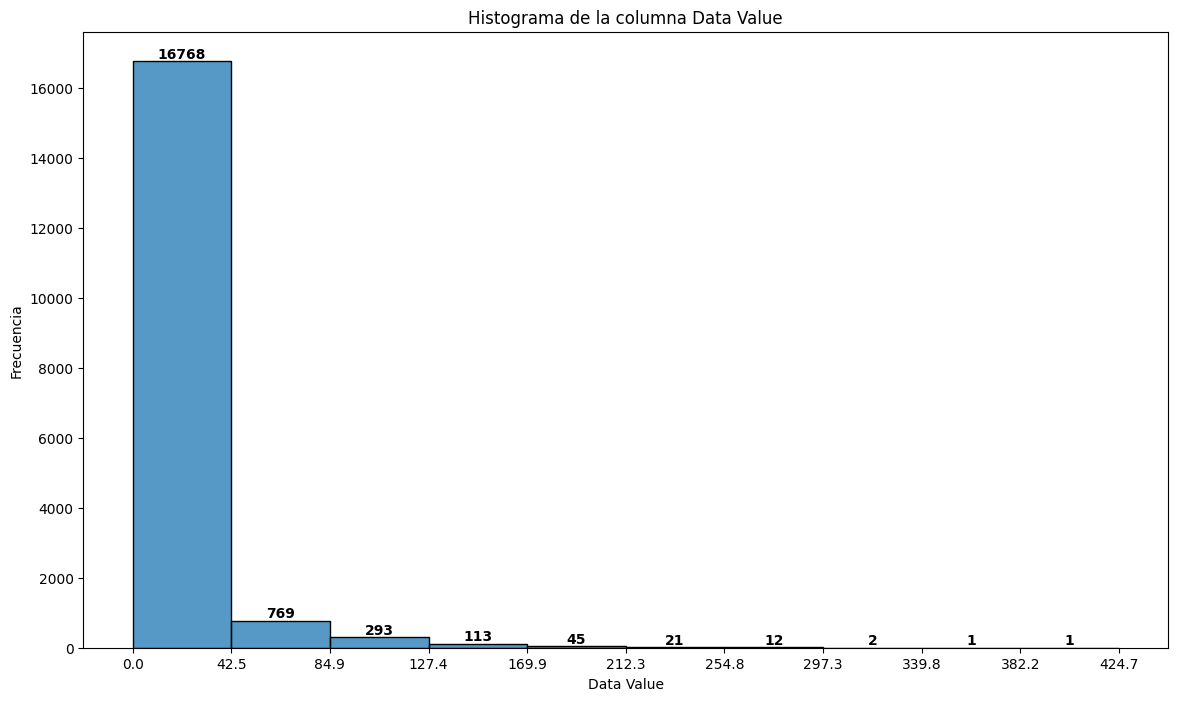

In [ ]:
plt.figure(figsize=(14, 8))
hist = sns.histplot(x=air_quality['Data Value'], bins=10)
plt.title('Histograma de la columna Data Value')
plt.xlabel('Data Value')
plt.ylabel('Frecuencia')

for patch in hist.patches:
    freq = int(patch.get_height())
    
    x = patch.get_x() + patch.get_width() / 2
    y = freq
    
    hist.annotate(f'{freq}', (x, y), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black', rotation=0)

bin_width = hist.patches[0].get_width()
bin_edges = np.arange(0, bin_width * len(hist.patches) + 1, bin_width)
plt.xticks(bin_edges)

plt.show()

Dividi la cantidad de datos en 10 grupos. La mayoria de los valores están ubicados en el primer grupo que esta entre 0 y 42.5. Luego el resto de los grupos se reducen drasticamente.

#### Gráfico Boxplot

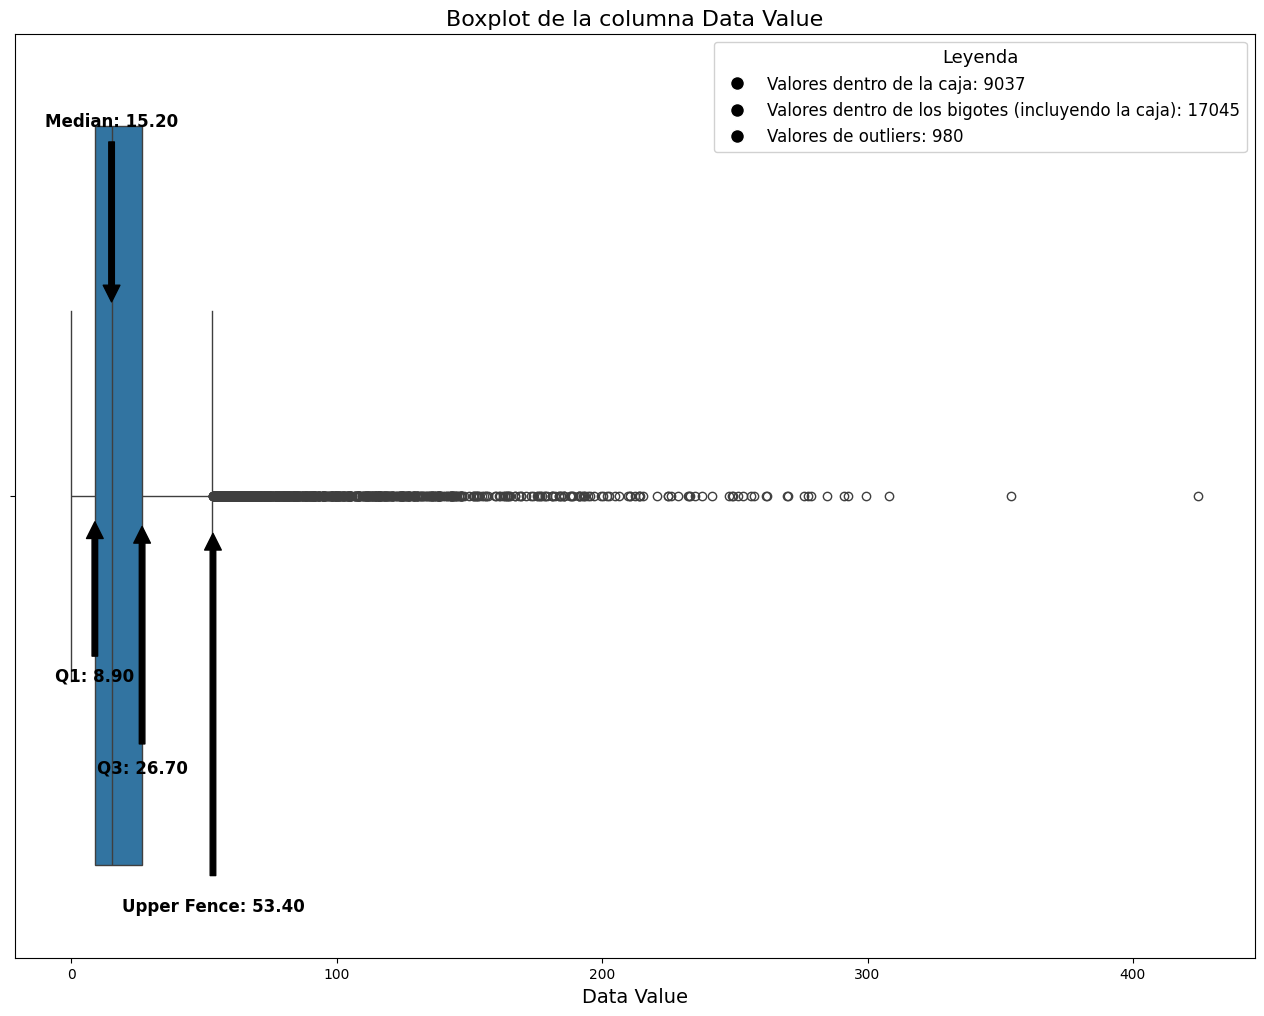

In [ ]:
plt.figure(figsize=(16, 12))
boxplot = sns.boxplot(x=air_quality['Data Value'])
plt.title('Boxplot de la columna Data Value', fontsize=16)
plt.xlabel('Data Value', fontsize=14)

stats = air_quality['Data Value'].describe(percentiles=[.25, .5, .75])
q1 = stats['25%']
median = stats['50%']
q3 = stats['75%']
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

outliers = air_quality[(air_quality['Data Value'] < lower_fence) | (air_quality['Data Value'] > upper_fence)].shape[0]

within_box = air_quality[(air_quality['Data Value'] >= q1) & (air_quality['Data Value'] <= q3)].shape[0]
within_whiskers = air_quality[(air_quality['Data Value'] >= lower_fence) & (air_quality['Data Value'] <= upper_fence)].shape[0]

plt.annotate(f'Median: {median:.2f}', xy=(median, -0.2), xytext=(median, -0.4), ha='center',
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, fontweight='bold')
plt.annotate(f'Q1: {q1:.2f}', xy=(q1, 0.02), xytext=(q1, 0.2), ha='center',
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, fontweight='bold')
plt.annotate(f'Q3: {q3:.2f}', xy=(q3, 0.02), xytext=(q3, 0.3), ha='center',
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, fontweight='bold')
plt.annotate(f'Upper Fence: {upper_fence:.2f}', xy=(upper_fence, 0.02), xytext=(upper_fence, 0.45), ha='center',
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, fontweight='bold')

legend_labels = [
    f'Valores dentro de la caja: {within_box}',
    f'Valores dentro de los bigotes (incluyendo la caja): {within_whiskers}',
    f'Valores de outliers: {outliers}'
]

legend_elements = [Line2D([0], [0], color='w', marker='o', markerfacecolor='black', markersize=10, label=f'Valores dentro de la caja: {within_box}'),
                   Line2D([0], [0], color='w', marker='o', markerfacecolor='black', markersize=10, label=f'Valores dentro de los bigotes (incluyendo la caja): {within_whiskers}'),
                   Line2D([0], [0], color='w', marker='o', markerfacecolor='black', markersize=10, label=f'Valores de outliers: {outliers}')]

plt.legend(handles=legend_elements, fontsize=12, loc='upper right', frameon=True, framealpha=0.9, facecolor='white', title='Leyenda', title_fontsize='13')

plt.show()


La mayoría de los valores se encuentran entre 8.90 y 26.70

La mediana es el valor 15.20

Luego del valor 53.40 hay outliers

#### Indicaciones para ETL

**Hay que eliminar los valores outliers porque son pocos y el sesgo es demasiado marcado.**

### Columnas Categóricas

Se seleccionan las columnas categoricas.

In [31]:
columnas_categoricas = air_quality.select_dtypes(object).columns
print("Columnas Categóricas:", columnas_categoricas)

Columnas Categóricas: Index(['Name', 'Measure', 'Measure Info', 'Geo Type Name', 'Geo Place Name',
       'Time Period', 'Start_Date'],
      dtype='object')


Las columnas 'Geo Place Name', 'Time Period' y 'Start_Date' no van a ser analizadas.

La columna 'Geo Place Name' tiene todos lo barrios de Nueva York. Son muchos. Como este analisis es a nivel general se lo va a ignorar en este EDA.

Las columnas 'Time Period' y 'Start_Date' son indicadores de tiempo por lo que seran ignoradas en este EDA.

In [90]:
columnas_a_categoricas = ['Name', 'Measure', 'Measure Info', 'Geo Type Name']

#### Barplot de las Columnas Categóricas

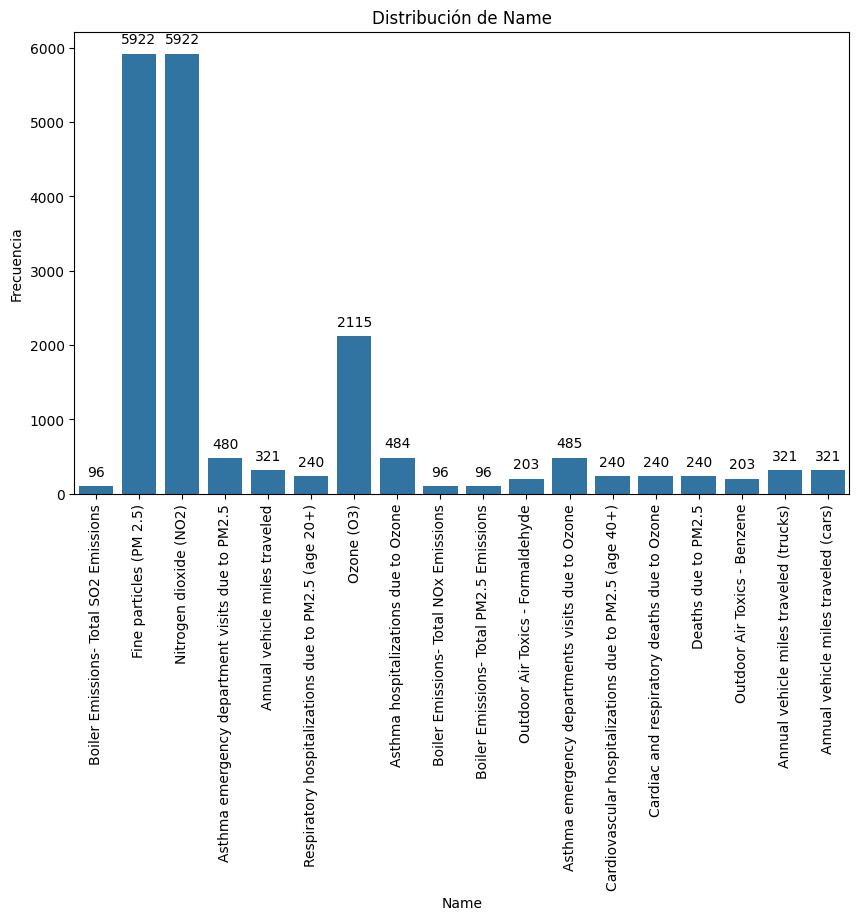

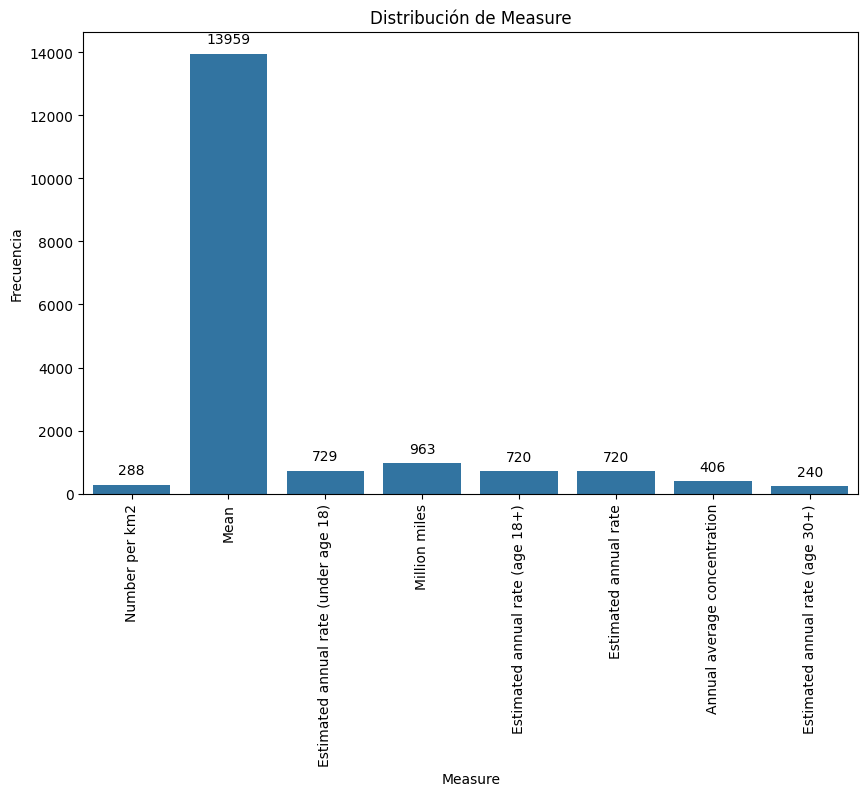

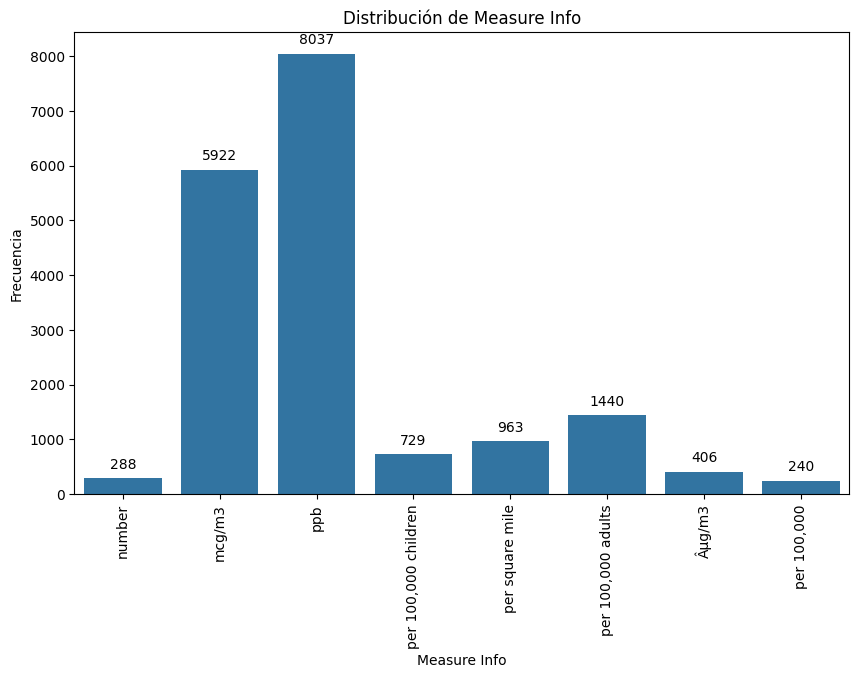

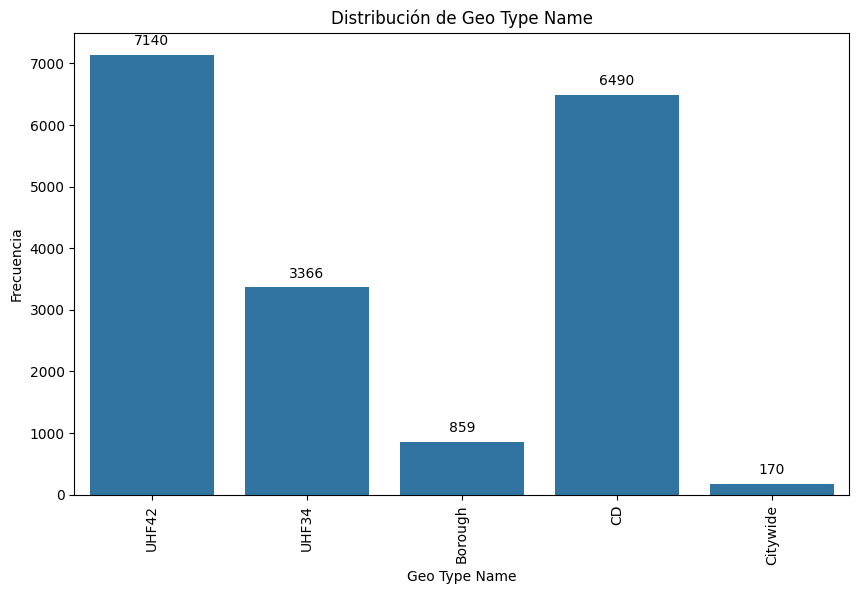

In [91]:
for columna in columnas_categoricas:
    plt.figure(figsize=(10, 6))
    bar_plot = sns.countplot(x=columna, data=air_quality)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)
    
    for p in bar_plot.patches:
        bar_plot.annotate(format(p.get_height(), '.0f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 10), 
                          textcoords = 'offset points')
    
    plt.show()

En la columna 'Name' hay dos categorías dominantes: 'Fine particles' y 'Nitrogen dioxide'. Ambas poseen la misma cantidad.

En la columna 'Measure' la categoría dominante es 'mean', también llamado promedio.

En la columna 'Measure Info' las categorías dominantes son: en primer lugar, 'ppb' y, en segundo lugar, 'mcg/m3'.

En la columna 'Geo Type Name' las categorías mas dominantes son: en primer lugar, 'UHF42' y, en segundo lugar, 'CD'. 

## Correlaciones